<a href="https://colab.research.google.com/github/ouyibei/Smart_Logistics/blob/master/SupplyChain/SupplyChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load - data
dataset = pd.read_csv('/content/drive/My Drive/Data/SupplyChain.csv', encoding='unicode_escape')

In [5]:
# Check - Missing value
dataset.isnull().sum()
# Customer Zipcode
# Order Zipcode 
# Product Description 

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [6]:
# Fill - Zipcode
dataset['Customer Zipcode'].value_counts() 
dataset['Customer Zipcode'].isnull().sum()
dataset['Customer Zipcode'] = dataset['Customer Zipcode'].fillna(0)

In [7]:
# Create - Customer Full Name
dataset[['Customer Fname', 'Customer Lname']] 
dataset['Customer Full Name'] = dataset['Customer Fname'] + dataset['Customer Lname']
dataset['Customer Full Name']

0            CallyHolloway
1                IreneLuna
2         GillianMaldonado
3                 TanaTate
4            OrliHendricks
                ...       
180514       MariaPeterson
180515         RonaldClark
180516           JohnSmith
180517           MarySmith
180518        AndreaOrtega
Name: Customer Full Name, Length: 180519, dtype: object

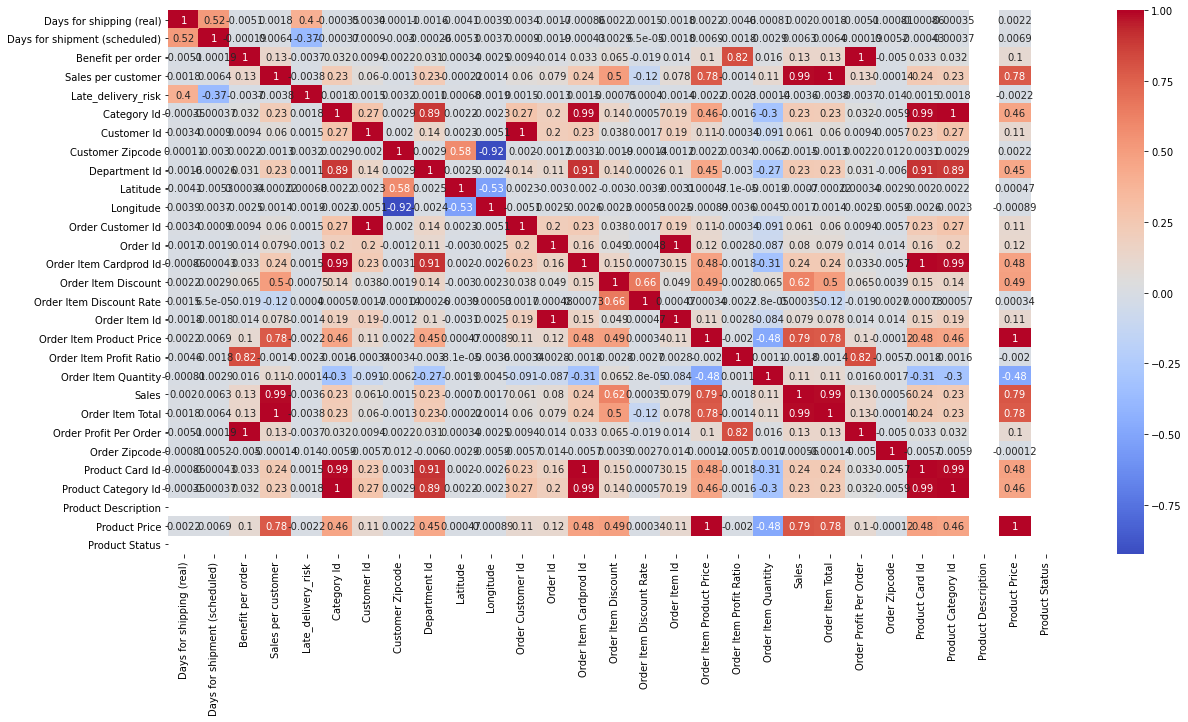

In [8]:
# Check - Correlation
data = dataset
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# Order Item Total = Sales per customer
# Order Item Id = Order Id
# Product Card Id = Order Item Cardprod Id
# Order Customer I d = Customer Id

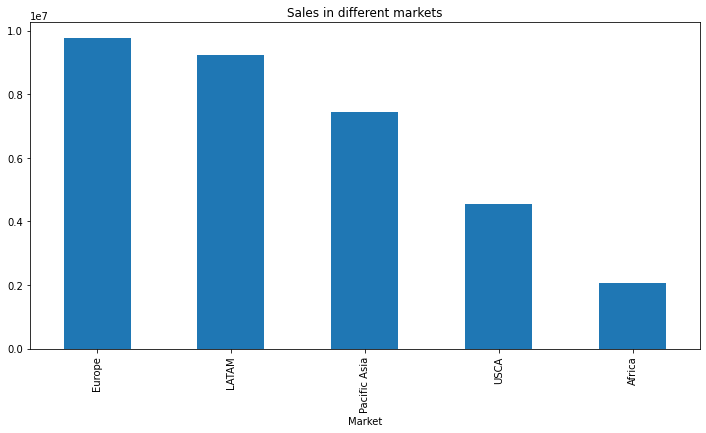

In [9]:
# EDA
# Explore - Sales by Market
data['Market'].value_counts()
market = data.groupby('Market')
data['Sales per customer']
market['Sales per customer'].sum()
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different markets')

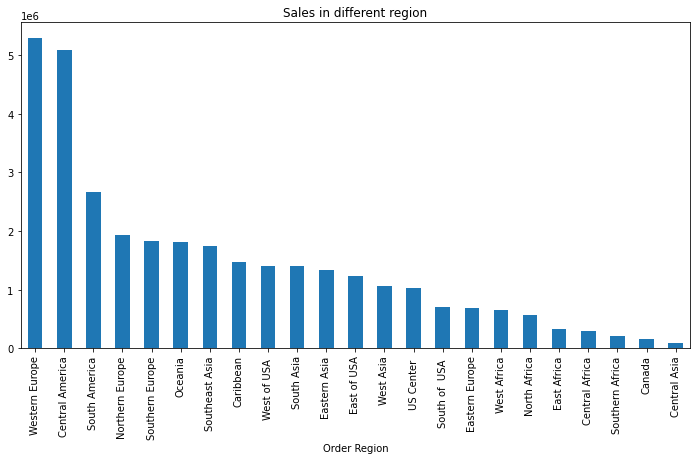

In [10]:
# Explore - Sales by Region
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different region')

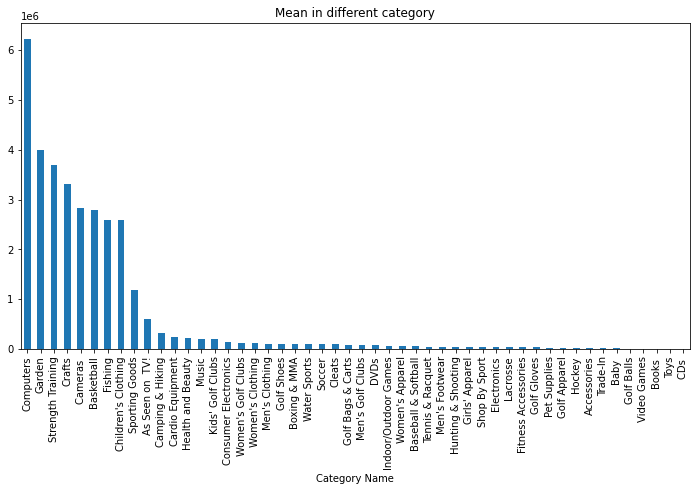

In [11]:
# Explore - Sales by Category name
cat = data.groupby('Category Name')
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Total Sales in different category')
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Mean in different category')

In [12]:
# Explore - order date (DateOrders) => year, month, week_day,....
data['order date (DateOrders)'].value_counts()
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M')
data[['order_year','order_month','order_week_day','order_hour','order_month_year']] 

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


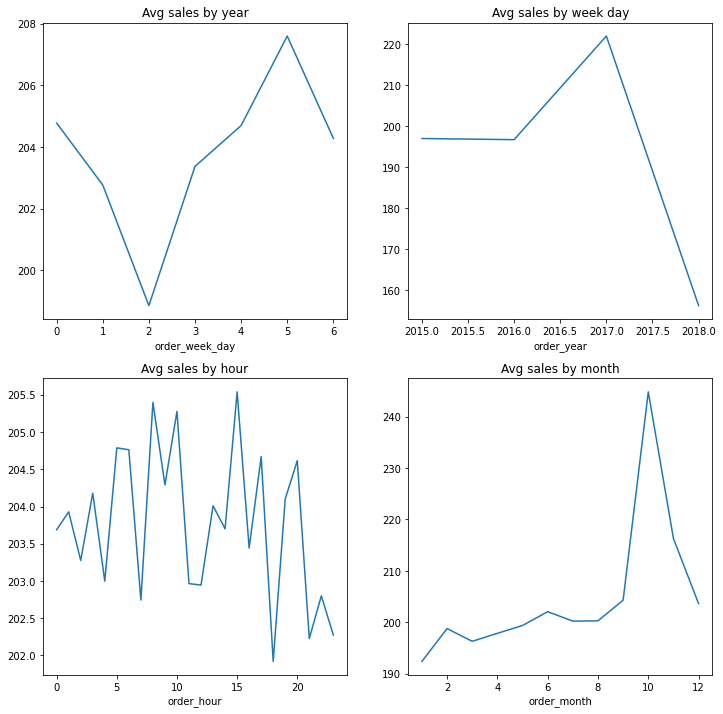

In [13]:
# Explore - Sales by time ( year, month, day, hour)
plt.figure(figsize = (10,12))
plt.subplot(2,2,1)
df_year = data.groupby('order_week_day')
df_year['Sales'].mean().plot(figsize=(12,12), title='Avg sales by year')

plt.subplot(2,2,2)
df_day = data.groupby('order_year')
df_day['Sales'].mean().plot(figsize=(12,12), title='Avg sales by week day')

plt.subplot(2,2,3)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(12,12), title='Avg sales by hour')

plt.subplot(2,2,4)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(figsize=(12,12), title='Avg sales by month')
plt.show()

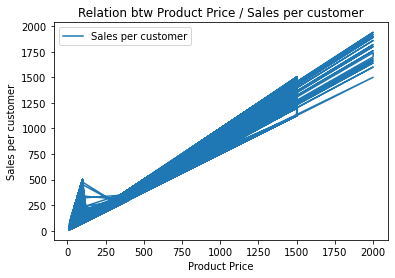

In [14]:
# Explore - Product Price / Sales per customer
data.plot( x ='Product Price', y= 'Sales per customer')
plt.title('Relation btw Product Price / Sales per customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')
plt.show()

In [15]:
# RFM
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']
data[['TotalPrice', 'Order Item Quantity', 'Order Item Total']]
data['Order Item Quantity'].value_counts()

# Change Format - order date (DateOrders) to_datetime
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['order date (DateOrders)']

# check last order time
data['order date (DateOrders)'].max()

# set now = 2018-2-1
import datetime
present  = datetime.datetime(2018, 2, 1)

In [16]:
# Calculate RFM of each user
# groupby - Order Customer Id
# rencency: order data (DateOrder) = x.max is the last order day
# frequency: Order Id = len('Order Id')
# monetary: TotalPrice  = sum('TotalPrice')
customer_seg = data.groupby('Order Customer Id').agg({\
    'order date (DateOrders)': lambda x: (present-x.max()).days, \
    'Order Id': lambda x: len(x), \
    'TotalPrice': lambda x: x.sum()})
customer_seg

,order date (DateOrders),Order Id,TotalPrice
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032
...,...,...,...
20753,0,1,161.869995
20754,0,1,172.660004
20755,0,1,314.640015


In [17]:
customer_seg.rename(columns={'order date (DateOrders)':'R_Value', \
                             'Order Id':'F_Value', \
                             'TotalPrice':'M_Value'}, inplace=True)
customer_seg

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032
...,...,...,...
20753,0,1,161.869995
20754,0,1,172.660004
20755,0,1,314.640015


In [18]:
# separate into 4 quarters
quantiles = customer_seg.quantile([0.25, 0.5, 0.75])
quantiles
quantiles.shape
quantiles.columns

Index(['R_Value', 'F_Value', 'M_Value'], dtype='object')

In [19]:
# R_Value : less is better  
def R_Score(a, b, c):
    if a <= c[b][0.25]:
        return 4
    elif a <= c[b][0.50]:
        return 3
    elif a <= c[b][0.75]:
        return 2
    else:
        return 1

# F_Value & M_Value 
def FM_Score(a, b, c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]:
        return 3
    else:
        return 4

customer_seg['R_Score'] = customer_seg['R_Value'].apply(R_Score, args=('R_Value', quantiles))
customer_seg['F_Score'] = customer_seg['F_Value'].apply(FM_Score, args=('F_Value', quantiles))
customer_seg['M_Score'] = customer_seg['M_Value'].apply(FM_Score, args=('M_Value', quantiles))
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,2362.250061,1,1,2
2,136,10,2842.700073,3,3,3
3,229,18,6143.760057,2,4,4
4,380,14,4370.629991,1,3,3
5,457,7,2993.790032,1,2,3
...,...,...,...,...,...,...
20753,0,1,161.869995,4,1,1
20754,0,1,172.660004,4,1,1
20755,0,1,314.640015,4,1,2


In [20]:
def RFM_User(df):
    if df['M_Score'] > 2 and df['F_Score'] > 2 and df['R_Score'] > 2:
        return 'important_value_customer'
    if df['M_Score'] > 2 and df['F_Score'] <= 2 and df['R_Score'] > 2:
        return 'important_develop_customer'
    if df['M_Score'] > 2 and df['F_Score'] > 2 and df['R_Score'] <= 2:    
        return 'important_retain_customer'
    if df['M_Score'] > 2 and df['F_Score'] <= 2 and df['R_Score'] <= 2:
        return 'important_detain_customer'
    
    if df['M_Score'] <= 2 and df['F_Score'] > 2 and df['R_Score'] > 2:
        return 'normal_value_customer'
    if df['M_Score'] <= 2 and df['F_Score'] <= 2 and df['R_Score'] > 2:
        return 'normal_develop_customer'
    if df['M_Score'] <= 2 and df['F_Score'] > 2 and df['R_Score'] <= 2:    
        return 'normal_retain_customer'
    if df['M_Score'] <= 2 and df['F_Score'] <= 2 and df['R_Score'] <= 2:
        return 'normal_detain_customer'

customer_seg['Customer_Segmentation'] = customer_seg.apply(RFM_User, axis=1)
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,Customer_Segmentation
Order Customer Id,,,,,,,
1,792,1,2362.250061,1,1,2,normal_detain_customer
2,136,10,2842.700073,3,3,3,important_value_customer
3,229,18,6143.760057,2,4,4,important_retain_customer
4,380,14,4370.629991,1,3,3,important_retain_customer
5,457,7,2993.790032,1,2,3,important_detain_customer
...,...,...,...,...,...,...,...
20753,0,1,161.869995,4,1,1,normal_develop_customer
20754,0,1,172.660004,4,1,1,normal_develop_customer
20755,0,1,314.640015,4,1,2,normal_develop_customer
